In [93]:
import pandas as pd
import numpy as np
import statsmodels as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error


In [94]:
#load df
df = pd.read_csv('zillow_data.csv')
len(df.RegionName.unique()) ## 14723

14723

In [95]:
# cheking for null values
df.isnull().sum()


RegionID         0
RegionName       0
City             0
State            0
Metro         1043
CountyName       0
SizeRank         0
1996-04       1039
1996-05       1039
1996-06       1039
1996-07       1039
1996-08       1039
1996-09       1039
1996-10       1039
1996-11       1039
1996-12       1039
1997-01       1039
1997-02       1039
1997-03       1039
1997-04       1039
1997-05       1039
1997-06       1039
1997-07       1038
1997-08       1038
1997-09       1038
1997-10       1038
1997-11       1038
1997-12       1038
1998-01       1036
1998-02       1036
              ... 
2015-11          0
2015-12          0
2016-01          0
2016-02          0
2016-03          0
2016-04          0
2016-05          0
2016-06          0
2016-07          0
2016-08          0
2016-09          0
2016-10          0
2016-11          0
2016-12          0
2017-01          0
2017-02          0
2017-03          0
2017-04          0
2017-05          0
2017-06          0
2017-07          0
2017-08     

In [96]:
df.City.unique()

array(['Chicago', 'McKinney', 'Katy', ..., 'Pine Valley', 'Esopus',
       'Mount Crested Butte'], dtype=object)

In [97]:
# df_0 = df_0.drop(['SizeRank', 'State','RegionID','City','Metro','CountyName','RegionID'] , axis = 1)

In [98]:
# replace the null values
df_1 = df_0.fillna(method='ffill')

In [99]:
def get_datetimes(df):
    return pd.to_datetime(df.columns.values[1:], format='%Y-%m')

In [100]:
# df_1 is our index in datetime obj we want to make a new dataframe

df_index_1 = get_datetimes(df_1)
df_index_1

DatetimeIndex(['1996-04-01', '1996-05-01', '1996-06-01', '1996-07-01',
               '1996-08-01', '1996-09-01', '1996-10-01', '1996-11-01',
               '1996-12-01', '1997-01-01',
               ...
               '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01', '2018-01-01', '2018-02-01',
               '2018-03-01', '2018-04-01'],
              dtype='datetime64[ns]', length=265, freq=None)

In [101]:
def melt_data(df):
    melted = pd.melt(df, id_vars=['RegionName', 'City', 'State', 'Metro', 
                                  'CountyName', 'RegionID', 'SizeRank'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    return melted.groupby('time').agg({'value':'median'})

In [102]:
df_median = melt_data(df)
df_median.head()

,value
time,
1996-04-01,99500.0
1996-05-01,99500.0
1996-06-01,99700.0
1996-07-01,99700.0
1996-08-01,99800.0


In [104]:
df_median = df_median.to_csv()

In [70]:
df_median.head()
# type(j.time)
df_median.isnull().sum()

value    0
dtype: int64

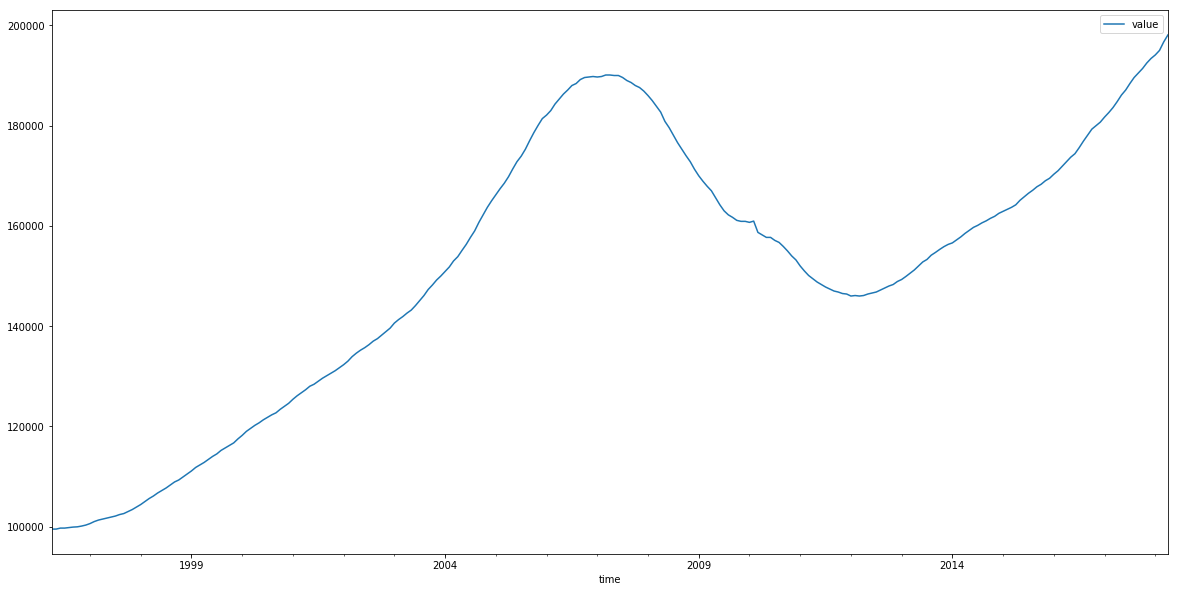

In [92]:
# I do not look stationary. For Modeling it HAS to be stationary
df_median.plot(figsize = (20,10), subplots=False, legend=True)
plt.show()

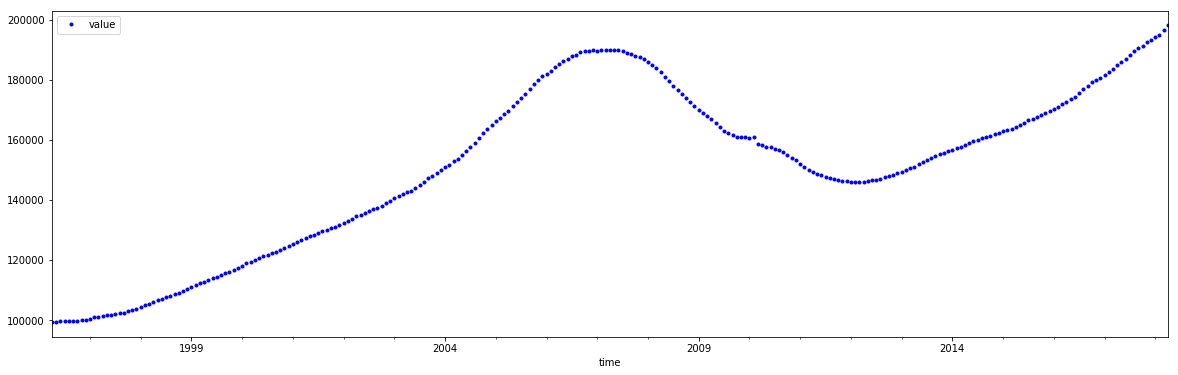

In [72]:
df_median.plot(figsize = (20,6), style = ".b")
import matplotlib.pyplot as plt
plt.show()

In [89]:
# need to convert into stationary using diff
df_diff = df_median.diff(periods = 1)
df_diff.head()

,value
time,
1996-04-01,NaN
1996-05-01,0.0
1996-06-01,200.0
1996-07-01,0.0
1996-08-01,100.0


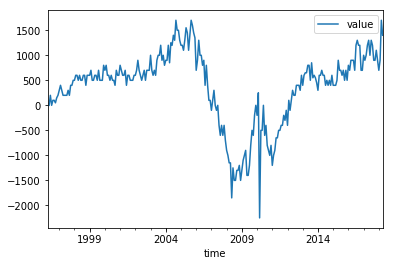

In [74]:
df_diff.plot()

In [84]:
# need to drop the NA value for the 1996-12-31 year 
df_diff_d = df_diff.drop(df_diff.index[0])
df_diff_d.head()
df_diff_d.info()
df_diff_d.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 264 entries, 1996-05-01 to 2018-04-01
Data columns (total 1 columns):
value    264 non-null float64
dtypes: float64(1)
memory usage: 4.1 KB


value    0
dtype: int64

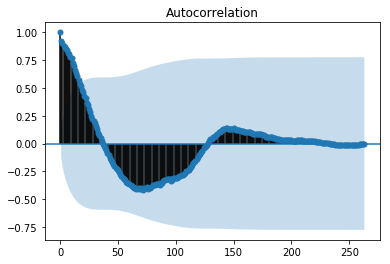

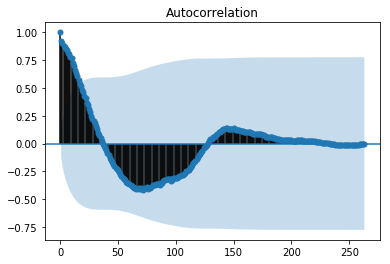

In [76]:

#plot autocorrelation for each lag (alpha is confidence interval)
plot_acf(df_diff_d, alpha=.05)

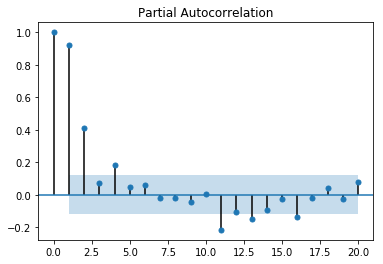

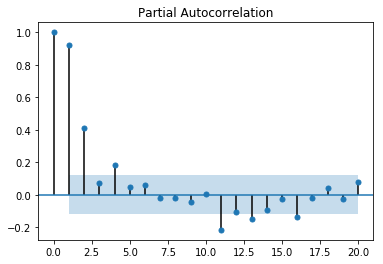

In [77]:
plot_pacf( df_diff_d, alpha=.05, lags=20)# see if its drop
# p value is 2


In [78]:
from statsmodels.tsa.arima_model import ARIMA

# fit model
model = ARIMA(df_diff_d,order=(2,1,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                  263
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1825.593
Method:                       css-mle   S.D. of innovations            250.062
Date:                Sun, 28 Jul 2019   AIC                           3663.187
Time:                        16:59:50   BIC                           3684.620
Sample:                    06-01-1996   HQIC                          3671.800
                         - 04-01-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             4.9721      8.148      0.610      0.542     -10.997      20.941
ar.L1.D.value    -0.8904      0.195     -4.571      0.000      -1.272      -0.509
ar.L2.D.value     0.0563      0.158     